In [30]:
!pip install gradio

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import tensorflow.keras.models as Models
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import gradio as gr
import matplotlib.pyplot as plot

In [32]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

In [33]:
import pathlib

# dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = '/kaggle/input/intel-image-classification/seg_train/seg_train'

In [34]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 14034 files belonging to 6 classes.
Using 11228 files for training.


In [35]:
class_names = train_ds.class_names
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


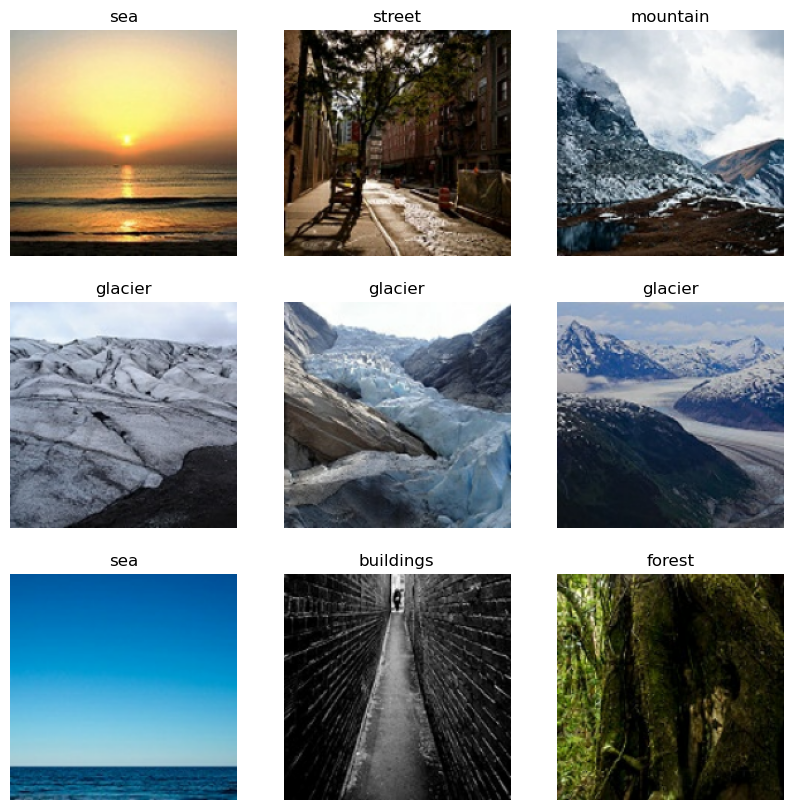

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [42]:
data_augmentation = keras.Sequential(
[
  layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1),
]
)

In [43]:

num_classes = 6
model = Models.Sequential()
model.add(data_augmentation)
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(5,5))
model.add(layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(5,5))
model.add(layers.Flatten())
model.add(layers.Dense(180,activation='relu'))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(50,activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(6,activation='softmax'))
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 178, 178, 200)     5600      
                                                                 
 conv2d_25 (Conv2D)          (None, 176, 176, 180)     324180    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 35, 35, 180)      0         
 2D)                                                             
                                                                 
 conv2d_26 (Conv2D)          (None, 33, 33, 180)       291780    
                                                      

In [44]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [45]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 14034 files belonging to 6 classes.
Using 2806 files for validation.


In [ ]:
epochs=12
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/12
351/351 [==============================] - 121s 327ms/step - loss: 1.3969 - accuracy: 0.4322 - val_loss: 1.1596 - val_accuracy: 0.5324
Epoch 2/12
351/351 [==============================] - 115s 327ms/step - loss: 1.1227 - accuracy: 0.5540 - val_loss: 0.9936 - val_accuracy: 0.6030
Epoch 3/12
351/351 [==============================] - 115s 328ms/step - loss: 1.0581 - accuracy: 0.5875 - val_loss: 0.9462 - val_accuracy: 0.6290
Epoch 4/12
351/351 [==============================] - 116s 331ms/step - loss: 0.9878 - accuracy: 0.6225 - val_loss: 0.8023 - val_accuracy: 0.6907
Epoch 5/12
351/351 [==============================] - 116s 329ms/step - loss: 0.9326 - accuracy: 0.6506 - val_loss: 0.7562 - val_accuracy: 0.7156
Epoch 6/12
351/351 [==============================] - 115s 327ms/step - loss: 0.9054 - accuracy: 0.6639 - val_loss: 0.8787 - val_accuracy: 0.6689
Epoch 7/12
351/351 [==============================] - 116s 329ms/step - loss: 0.8351 - accuracy: 0.7004 - val_loss: 0.7281 -

In [ ]:
plot.plot(history.history['accuracy'])
plot.plot(history.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [ ]:

def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(6)}

In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix

# Load the test dataset
# test_ds = tf.data.experimental.load('/kaggle/input/intel-image-classification/seg_test/seg_test', (tf.TensorSpec(shape=(32, 4), dtype=tf.float32), tf.TensorSpec(shape=(32,), dtype=tf.int64)))

# Evaluate the model on the test dataset and calculate accuracy, precision, recall, F1-score
print("[INFO] Calculating evaluation metrics")
y_true = []
y_pred = []
for elem in val_ds.as_numpy_iterator():
    x, y_true_batch = elem
    y_pred_batch = model.predict(x)
    y_true.extend(y_true_batch)
    y_pred.extend(tf.argmax(y_pred_batch, axis=1))

print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
print("Confusion matrix:\n", cm)


In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import r2_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load the test dataset
# test_ds = tf.data.experimental.load('/kaggle/input/intel-image-classification/seg_test/seg_test', (tf.TensorSpec(shape=(32, 4), dtype=tf.float32), tf.TensorSpec(shape=(32,), dtype=tf.int64)))

# Evaluate the model on the test dataset and calculate accuracy
print("[INFO] Calculating model accuracy")
scores = model.evaluate(val_ds)
print(f"Test Accuracy: {round(scores[1], 4)*100}%")

# Extract the predictions and true values from the test dataset
y_true_list = []
y_pred_list = []
for elem in val_ds.as_numpy_iterator():
    x, y_true = elem
    y_pred = model.predict(x)
    y_true_onehot = tf.one_hot(y_true, depth=6).numpy()  # Convert y_true to one-hot encoding
    y_true_list.append(y_true_onehot)
    y_pred_list.append(y_pred)

# Concatenate the predictions and true values
y_true = np.concatenate(y_true_list)
y_pred = np.concatenate(y_pred_list)

# Calculate the R2 score
# r2 = r2_score(y_true, y_pred, multioutput='variance_weighted')

# print('R2 score:', r2)

# Calculate the ROC curve and AUC score
fpr = {}
tpr = {}
roc_auc = {}
for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure()
lw = 2
colors = ['red', 'green', 'blue','yellow','black','cyan']
for i, color in zip(range(6), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=6)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

/opt/conda/lib/python3.7/site-packages/gradio/inputs.py:258: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/opt/conda/lib/python3.7/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/opt/conda/lib/python3.7/site-packages/gradio/outputs.py:198: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/opt/conda/lib/python3.7/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Kaggle notebooks require sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://0a8bfd90ef332e575e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


1/1 [==============================] - 0s 21ms/step


[INFO] Calculating model accuracy
88/88 [==============================] - 5s 53ms/step - loss: 0.5660 - accuracy: 0.8161
Test Accuracy: 81.61%
1/1 [==============================] - 0s 28ms/step


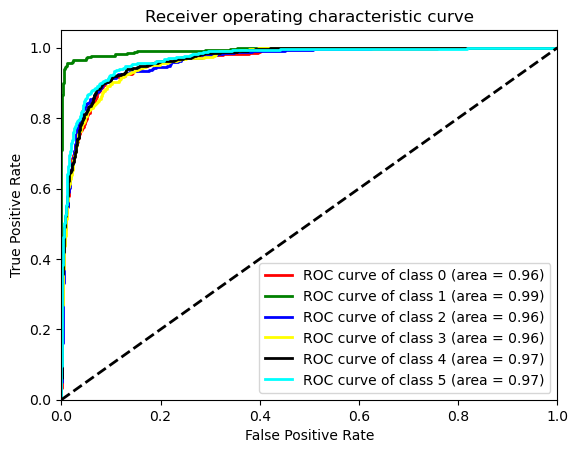